### 支持向量机（Support Vector Machine, SVM）算法详解


#### 一、核心概念  
支持向量机（SVM）是一种**监督学习算法**，核心用于分类任务（可扩展至回归）。其核心思想是：在特征空间中找到**最优超平面**，使不同类别的样本被清晰分隔，且超平面与两类样本的**间隔最大**（间隔即超平面到最近样本的距离）。  

- **关键术语**：  
  - **超平面**：分类决策边界（二维为直线，三维为平面，高维为超平面），表达式为 $ w^Tx + b = 0 $（$ w $ 为法向量，$ b $ 为偏置）；  
  - **支持向量**：距离超平面最近的样本点，决定超平面的位置和间隔，是SVM的核心（移除非支持向量不影响模型）；  
  - **间隔（Margin）**：超平面到两侧最近样本的距离之和，目标是最大化间隔（间隔越大，模型泛化能力越强）。  


#### 二、数学模型与核心原理  
SVM的核心是通过优化找到“最大间隔超平面”，根据数据是否线性可分分为两种情形：  


##### 1. 线性可分情形（硬间隔SVM）  
当样本可被超平面完全分隔时，目标是最大化间隔：  

- **分类约束**：所有样本需被正确分类，即  
  $$ y_i(w^Tx_i + b) \geq 1 \quad (i=1,2,...,m) $$  
  其中 $ y_i \in \{+1, -1\} $ 为样本标签，左侧为“函数间隔”（需≥1，确保样本在间隔外）。  

- **优化目标**：间隔大小为 $ \frac{2}{\|w\|} $（$ \|w\| $ 为 $ w $ 的L2范数），最大化间隔等价于最小化 $ \|w\| $：  
  $$ \min_{w,b} \frac{1}{2}\|w\|^2 \quad \text{s.t.} \quad y_i(w^Tx_i + b) \geq 1 \quad (\forall i) $$  


##### 2. 线性不可分情形（软间隔SVM）  
当存在噪声或样本重叠时，允许部分样本违反分类约束，引入**松弛变量** $ \xi_i \geq 0 $ 衡量违反程度：  

- **约束条件**：  
  $$ y_i(w^Tx_i + b) \geq 1 - \xi_i \quad (\forall i) $$  

- **优化目标**：平衡间隔最大化与错误分类惩罚：  
  $$ \min_{w,b,\xi} \frac{1}{2}\|w\|^2 + C\sum_{i=1}^m \xi_i $$  
  其中 $ C > 0 $ 为正则化参数：  
  - $ C $ 越大：对错误分类的惩罚越重（倾向硬间隔，可能过拟合）；  
  - $ C $ 越小：允许更多错误分类（间隔更大，可能欠拟合）。  


##### 3. 非线性情形（核函数SVM）  
当样本在低维空间线性不可分时，通过**核函数（Kernel Trick）** 将数据映射到高维空间，使其线性可分（避免直接计算高维映射，降低复杂度）。  

- **核函数定义**：设 $ \phi(x) $ 为低维到高维的映射，则核函数 $ K(x_i, x_j) = \phi(x_i)^T\phi(x_j) $，直接计算低维样本的内积，等价于高维空间的内积。  

- **常用核函数**：  

  | 核函数            | 表达式                                            | 适用场景                                   |
  |:---------------|:-----------------------------------------------|:---------------------------------------|
  | 线性核            | $ K(x_i, x_j) = x_i^Tx_j + C $                 | C通常为0，线性可分数据（如文本分类），计算快，可解释性强          |
  | RBF核（常用）       | $ K(x_i, x_j) = \exp(-\gamma\|x_i - x_j\|^2) $ | 非线性数据（如图像识别），$ \gamma $ 控制核宽度（越大拟合越复杂） |


#### 三、代码实例（3个独立Python文件）  


##### 1. 简洁版：手撕线性SVM（硬间隔）  

训练集准确率：1.0000


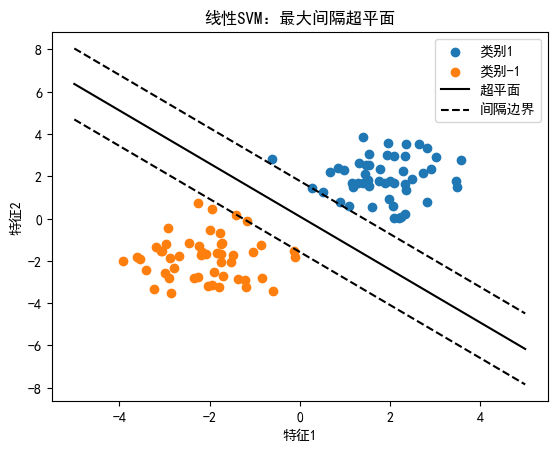

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 解决中文显示问题
matplotlib.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
matplotlib.rcParams["axes.unicode_minus"] = False

# 1. 生成线性可分数据
np.random.seed(42)
X1 = np.random.randn(50, 2) + np.array([2, 2])  # 类别1
X2 = np.random.randn(50, 2) + np.array([-2, -2])  # 类别-1
X = np.vstack([X1, X2])
y = np.hstack([np.ones(50), -np.ones(50)])  # 标签：1和-1

# 2. 硬间隔SVM实现（梯度下降）
class LinearSVM:
    def __init__(self, lr=0.001, epochs=1000):
        self.lr = lr  # 学习率
        self.epochs = epochs  # 迭代次数
        self.w = None  # 权重
        self.b = None  # 偏置

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            for i in range(n_samples):
                # 检查是否满足约束：y_i(w·x_i + b) ≥ 1
                condition = y[i] * (np.dot(self.w, X[i]) + self.b) >= 1
                if not condition:
                    # 违反约束时更新参数（梯度下降）
                    self.w += self.lr * y[i] * X[i]
                    self.b += self.lr * y[i]

    def predict(self, X):
        # 符号函数：w·x + b ≥ 0 → 1，否则→-1
        return np.sign(np.dot(X, self.w) + self.b)

# 3. 训练与评估
model = LinearSVM(lr=0.001, epochs=1000)
model.fit(X, y)
y_pred = model.predict(X)
accuracy = np.mean(y_pred == y)
print(f"训练集准确率：{accuracy:.4f}")

# 4. 可视化超平面与间隔
def plot_svm(model):
    plt.scatter(X1[:, 0], X1[:, 1], label="类别1")
    plt.scatter(X2[:, 0], X2[:, 1], label="类别-1")

    # 绘制超平面：w·x + b = 0
    x_range = np.linspace(-5, 5, 100)
    if model.w[1] != 0:  # 避免除零
        y_hyper = (-model.w[0] * x_range - model.b) / model.w[1]
        plt.plot(x_range, y_hyper, "k-", label="超平面")

        # 绘制间隔边界：w·x + b = 1 和 w·x + b = -1
        y_margin1 = (-model.w[0] * x_range - model.b + 1) / model.w[1]
        y_margin2 = (-model.w[0] * x_range - model.b - 1) / model.w[1]
        plt.plot(x_range, y_margin1, "k--", label="间隔边界")
        plt.plot(x_range, y_margin2, "k--")

    plt.xlabel("特征1")
    plt.ylabel("特征2")
    plt.title("线性SVM：最大间隔超平面")
    plt.legend()
    plt.show()

plot_svm(model)


##### 2. 简洁版：sklearn实现SVM（核函数对比）  

线性核准确率：1.0000
RBF核准确率：1.0000
xx:
[[-2.8340382 -2.8140382 -2.7940382 -2.7740382 -2.7540382]
 [-2.8340382 -2.8140382 -2.7940382 -2.7740382 -2.7540382]
 [-2.8340382 -2.8140382 -2.7940382 -2.7740382 -2.7540382]
 [-2.8340382 -2.8140382 -2.7940382 -2.7740382 -2.7540382]
 [-2.8340382 -2.8140382 -2.7940382 -2.7740382 -2.7540382]]

yy:
[[-3.30717959 -3.30717959 -3.30717959 -3.30717959 -3.30717959]
 [-3.28717959 -3.28717959 -3.28717959 -3.28717959 -3.28717959]
 [-3.26717959 -3.26717959 -3.26717959 -3.26717959 -3.26717959]
 [-3.24717959 -3.24717959 -3.24717959 -3.24717959 -3.24717959]
 [-3.22717959 -3.22717959 -3.22717959 -3.22717959 -3.22717959]]



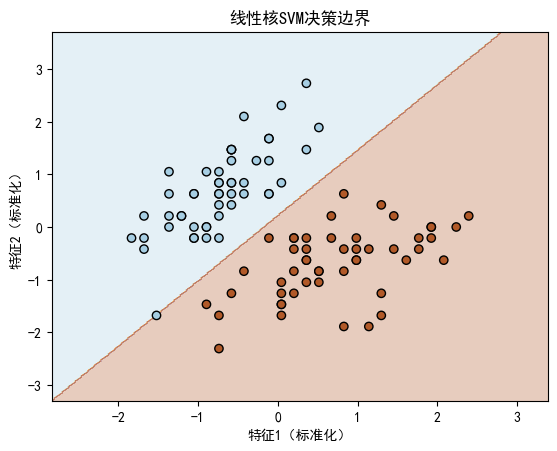

xx:
[[-2.8340382 -2.8140382 -2.7940382 -2.7740382 -2.7540382]
 [-2.8340382 -2.8140382 -2.7940382 -2.7740382 -2.7540382]
 [-2.8340382 -2.8140382 -2.7940382 -2.7740382 -2.7540382]
 [-2.8340382 -2.8140382 -2.7940382 -2.7740382 -2.7540382]
 [-2.8340382 -2.8140382 -2.7940382 -2.7740382 -2.7540382]]

yy:
[[-3.30717959 -3.30717959 -3.30717959 -3.30717959 -3.30717959]
 [-3.28717959 -3.28717959 -3.28717959 -3.28717959 -3.28717959]
 [-3.26717959 -3.26717959 -3.26717959 -3.26717959 -3.26717959]
 [-3.24717959 -3.24717959 -3.24717959 -3.24717959 -3.24717959]
 [-3.22717959 -3.22717959 -3.22717959 -3.22717959 -3.22717959]]



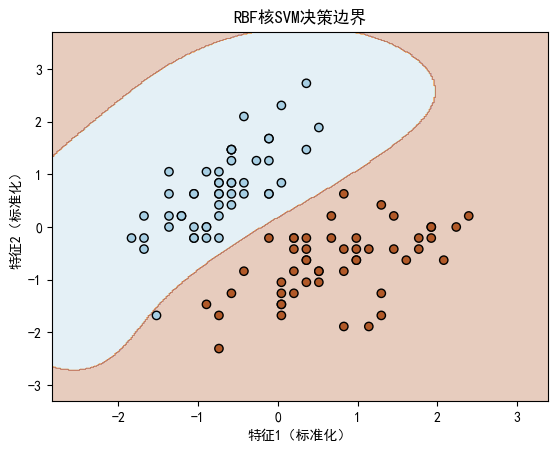

In [8]:
import matplotlib
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# 解决中文显示问题
matplotlib.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
matplotlib.rcParams["axes.unicode_minus"] = False

# 1. 加载数据集（鸢尾花二分类）
iris = datasets.load_iris()
X = iris.data[:100, :2]  # 取前100个样本（2类）和2个特征
y = iris.target[:100]    # 标签：0和1

# 2. 数据标准化（SVM必须步骤）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 4. 训练SVM（对比线性核和RBF核）
# 初始化一个使用线性核的支持向量机分类器
# kernel='linear' 表示使用线性核函数，适用于线性可分或近似线性可分的数据
# C=1.0 正则化参数，控制模型对错误分类的惩罚程度，值越大对错误分类的惩罚越重
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)

svm_linear.fit(X_train, y_train)

# RBF核
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=0.5, random_state=42)
svm_rbf.fit(X_train, y_train)

# 5. 评估
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
print(f"线性核准确率：{accuracy_score(y_test, y_pred_linear):.4f}")
print(f"RBF核准确率：{accuracy_score(y_test, y_pred_rbf):.4f}")

# 6. 可视化决策边界
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # 网格步长
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1   # 计算特征1的取值范围，在最小值基础上减1，最大值基础上加1，为绘制决策边界留出一定的边距
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # np.arange(x_min, x_max, h) 生成了一个从 x_min 到 x_max，步长为 h 的一维数组，代表 x 轴的坐标
    # 值。np.arange(y_min, y_max, h) 代表 y 轴的坐标值。np.meshgrid 会根据这两个一维数组生成二维坐标
    # 网格 xx 和 yy．
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    print(f"xx:\n{xx[:5, :5]}\n")  # 每一行都一样
    print(f"yy:\n{yy[:5, :5]}\n")

    # np.ravel() 将多维数组展平为一维数组，np.c_[] 将两个一维数组按列拼接，形成坐标,Z 数组中的每个值，对
    # 应 xx 和 yy 所确定坐标点的模型预测类别。
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # 将模型预测得到的一维结果数组 Z 重新调整为与 xx 相同的二维形状，以便后续绘制决策边界
    Z = Z.reshape(xx.shape)
    
    # 使用 plt.contourf 函数绘制决策边界的填充等高线图
    # cmap=plt.cm.Paired 表示使用 'Paired' 颜色映射，为不同类别的区域分配不同的颜色
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

    # 绘制散点图展示样本数据
    # X[:, 0] 表示取所有样本的第一个特征作为散点图的 x 坐标
    # X[:, 1] 表示取所有样本的第二个特征作为散点图的 y 坐标
    # c=y 表示根据样本的标签 y 对散点进行颜色编码，不同标签对应不同颜色
    # cmap=plt.cm.Paired 表示使用 'Paired' 颜色映射，为不同类别的散点分配不同颜色
    # edgecolor='k' 表示设置散点的边缘颜色为黑色
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')

    plt.xlabel("特征1（标准化）")
    plt.ylabel("特征2（标准化）")
    plt.title(title)
    plt.show()

# 绘制两个核函数的决策边界
plot_decision_boundary(svm_linear, X_scaled, y, "线性核SVM决策边界")
plot_decision_boundary(svm_rbf, X_scaled, y, "RBF核SVM决策边界")


##### 3. 全面版：sklearn实现（参数调优+评估）  

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

# 解决中文显示问题
matplotlib.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
matplotlib.rcParams["axes.unicode_minus"] = False

# 1. 加载真实数据集（乳腺癌检测）
data = load_breast_cancer()
X = data.data  # 30个特征
y = data.target  # 标签：0=恶性，1=良性
print(f"数据集规模：{X.shape}，类别分布：{np.bincount(y)}（恶性/良性）")

数据集规模：(569, 30)，类别分布：[212 357]（恶性/良性）


In [10]:
# 2. 数据预处理与划分
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # 标准化（SVM必须步骤）

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y  # 保持类别比例
)

# 3. 参数调优（网格搜索）- 调整为同时包含rbf和linear核
param_grid = {
    'C': [0.1, 1, 10],  # 正则化参数
    'gamma': [0.01, 0.1, 1],  # RBF核参数（线性核会忽略此参数）
    'kernel': ['rbf', 'linear']  # 同时尝试两种核函数
}

# 网格搜索+5折交叉验证
grid_search = GridSearchCV(

    # 定义要进行参数调优的模型，probability=True 表示启用概率估计功能，random_state=42 确保结果可复现
    estimator=SVC(probability=True, random_state=42),

    # 定义要搜索的参数网格，包含不同的 C、gamma 和 kernel 参数组合
    param_grid=param_grid,

    # 进行 5 折交叉验证，将数据集划分为 5 份，轮流使用其中 4 份训练，1 份验证
    cv=5,

    # 以 F1 分数作为评估指标，F1 分数综合考虑了精确率和召回率，适合处理类别不平衡的数据
    scoring='f1',

    # 使用所有可用的 CPU 核心并行计算，加速网格搜索过程
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"最优参数：{grid_search.best_params_}")
print(f"最优交叉验证F1：{grid_search.best_score_:.4f}")

最优参数：{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
最优交叉验证F1：0.9823


In [11]:
# 4. 最优模型评估
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # 良性概率

# 多指标评估
print("\n--- 测试集评估指标 ---")
print(f"准确率：{accuracy_score(y_test, y_pred):.4f}")
print(f"精确率：{precision_score(y_test, y_pred):.4f}")
print(f"召回率：{recall_score(y_test, y_pred):.4f}")
print(f"F1分数：{f1_score(y_test, y_pred):.4f}")
print(f"AUC：{roc_auc_score(y_test, y_pred_proba):.4f}")

print("\n--- 混淆矩阵 ---")
print(confusion_matrix(y_test, y_pred))
print("\n--- 分类报告 ---")
print(classification_report(y_test, y_pred, target_names=["恶性", "良性"]))


--- 测试集评估指标 ---
准确率：0.9766
精确率：0.9725
召回率：0.9907
F1分数：0.9815
AUC：0.9920

--- 混淆矩阵 ---
[[ 61   3]
 [  1 106]]

--- 分类报告 ---
              precision    recall  f1-score   support

          恶性       0.98      0.95      0.97        64
          良性       0.97      0.99      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



[0.26886059 0.28044597 0.25401291 0.28298243 0.00664635 0.11623951
 0.22081967 0.22462337 0.08201266 0.01938438 0.20531605 0.33370828
 0.00611356 0.2587027  0.19063123 0.21599443 0.01145567 0.02314741
 0.00276105 0.0988763  0.4041874  0.44156125 0.30892437 0.39872591
 0.26897682 0.01846078 0.1951737  0.33357811 0.3797706  0.11344708]


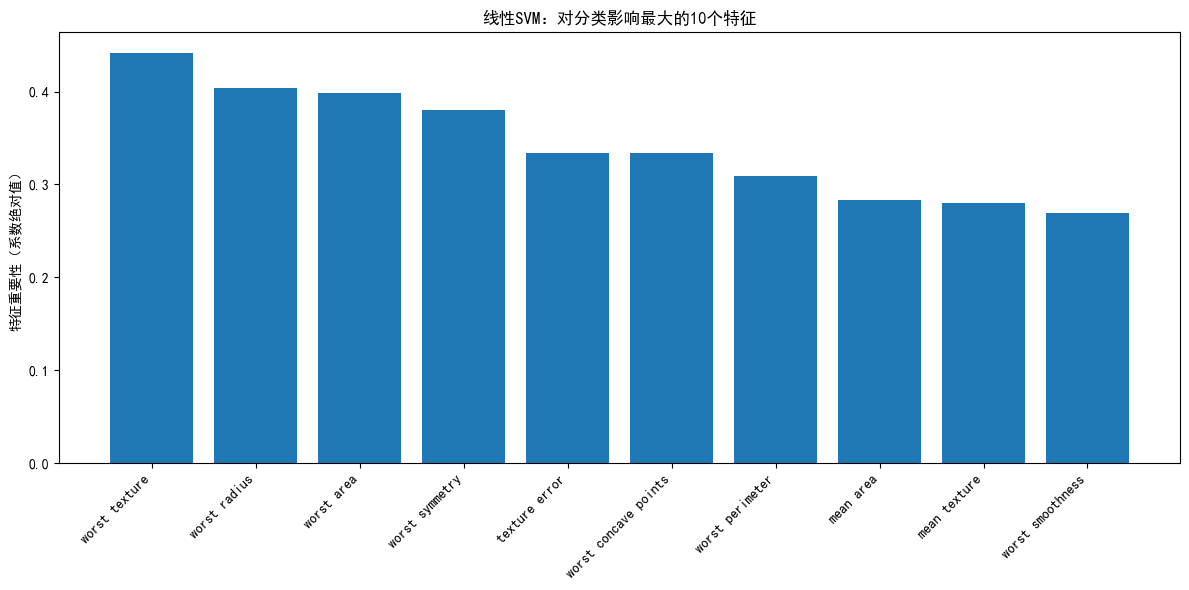

In [12]:
# 5. 特征重要性分析（线性核可直接获取，RBF核需间接计算）
if best_model.kernel == 'linear':
    # coef_[0] 用于获取线性核第一个（也是唯一的）系数数组，因为是二分类问题.系数数组中的每个元素对应
    # 一个特征的权重，权重绝对值越大，表明该特征对分类结果的影响越大。
    importances = np.abs(best_model.coef_[0])

    indices = np.argsort(importances)[::-1]  # 降序排列
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(10), importances[indices[:10]], align="center")
    plt.xticks(range(10), [data.feature_names[i] for i in indices[:10]], rotation=45, ha="right")
    plt.title("线性SVM：对分类影响最大的10个特征")
    plt.ylabel("特征重要性（系数绝对值）")
    plt.tight_layout()
    plt.show()
else:
    print("\n提示：RBF核SVM无法直接获取特征重要性，需使用线性核才能查看")

### 总结  
支持向量机通过最大化间隔和核函数技巧，在小样本、高维数据上表现优异，尤其适合文本分类、图像识别等场景。实践中需注意：
1. 必须对特征标准化（SVM依赖距离计算）；  
2. 重点调优参数 $ C $（正则化）和核函数参数（如RBF核的 $ \gamma $）；  
3. 大数据集建议使用线性核或近似算法提升效率。